In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from fur.path_assistant import PathAssistant
shift = PathAssistant('shift_03_16_2020',
    ignore_files=[
        'RefCurve_2020-03-16_0_084020_test.Wfm.bin'])
results_dir = shift.get_results_dir()
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift,
    "res_df_comb_filter_no_nd_filters_FLAT_data_03_16_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt"
)
from config import get_from_config


In [4]:

fluctuations_df.describe()

ch2_amplitude  var_of_ch1_amplitude     noise_var    N:IWCMI  \
count      39.000000          3.900000e+01  3.900000e+01  39.000000   
mean        0.465570          3.266137e-08  8.263785e-08  -2.438720   
std         0.157384          1.520837e-08  4.387676e-10   0.846288   
min         0.207347          1.011180e-08  8.188933e-08  -3.817292   
25%         0.332533          1.865505e-08  8.227845e-08  -3.083870   
50%         0.489203          3.455205e-08  8.254533e-08  -2.577662   
75%         0.584530          4.649478e-08  8.310445e-08  -1.697818   
max         0.727659          5.672459e-08  8.341012e-08  -1.051157   

        N:IBEAMA   N:IWCMBE   N:IWCMBR   N:IWCMBF   N:IWCMBG    N:IRFEPA  \
count  39.000000  39.000000  39.000000  39.000000  39.000000   39.000000   
mean   -2.228215  30.154296  33.091328  63.958835  28.242582  358.646456   
std     0.759040   2.366535   3.580412   3.109262   1.334719    0.575645   
min    -3.488905  27.527364  30.172405  58.813021  25.987532  357.685667   
25%    -2.798787  29.102664  31.714400  61.710674  27.462490  358.215930   
50%    -2.352075  29.903469  32.362994  64.420215  28.402981  358.762465   
75%    -1.585038  30.042833  32.481742  65.439572  28.610259  359.073130   
max    -0.976619  38.133934  45.273268  75.871423  32.246103  359.743663   

        N:ITC1RSH    N:ITC2RSH    N:ITC3RSH     N:ITC4RSH    N:ITC4LSH  \
count   39.000000    39.000000    39.000000  3.900000e+01    39.000000   
mean   453.476301  1370.568486  1594.843497  7.327710e+02  1044.367501   
std     17.398931    59.362040    48.017257  1.151730e-13    39.118617   
min    389.291110  1153.969000  1438.650000  7.327710e+02   907.582030   
25%    442.906845  1342.333525  1560.474275  7.327710e+02  1017.610750   
50%    462.803255  1400.778100  1621.616000  7.327710e+02  1067.170000   
75%    464.380005  1410.222050  1631.014000  7.327710e+02  1071.633050   
max    467.590715  1413.853000  1636.070950  7.327710e+02  1077.097000   

         N:ITC3LSH    N:ITC2LSH   N:ITC1LSH   N:ITC1RSV  N:ITC2RSV  \
count    39.000000    39.000000   39.000000   39.000000  39.000000   
mean   1604.398556  1502.686958  490.699614  108.445101  80.424574   
std      50.614974    64.657561   19.334454   21.887288   4.616339   
min    1432.315100  1272.396000  420.518490   79.254849  74.120552   
25%    1573.374025  1470.047275  479.772725   88.490976  76.226601   
50%    1632.756100  1537.995000  500.433010  108.112650  80.415000   
75%    1639.678550  1546.564175  502.398002  122.576178  83.578352   
max    1649.682500  1552.074550  507.250980  152.133500  89.613503   

        N:ITC3RSV     N:ITC4RSV   N:ITC4LSV  N:ITC3LSV  N:ITC2LSV   N:ITC1LSV  \
count   39.000000  3.900000e+01   39.000000  39.000000  39.000000   39.000000   
mean    94.087948  1.059989e+02  155.872551  71.413688  70.045168  128.325453   
std     10.073170  1.439663e-14   21.087909  11.721866   5.626352   27.907226   
min     80.315902  1.059989e+02  127.619950  55.455999  62.408400   90.783699   
25%     84.754675  1.059989e+02  136.439775  60.563951  64.877825  103.518297   
50%     94.309147  1.059989e+02  155.907605  71.602600  70.117253  127.155650   
75%    101.113975  1.059989e+02  169.885003  79.375151  73.856302  146.387425   
max    113.233100  1.059989e+02  197.472500  94.000305  80.991699  184.848890   

       N:IWCMI_recalibrated_to_IWCMI_absolute  \
count                               39.000000   
mean                                -2.157205   
std                                  0.748596   
min                                 -3.376641   
25%                                 -2.727882   
50%                                 -2.280108   
75%                                 -1.501829   
max                                 -0.929816   

       N:IBEAM_recalibrated_to_IWCMI_absolute   Sigma_um_X  Sigma_um_X_err  \
count                               39.000000    39.000000       39.000000   
mean                                -2.154098  1132.9393

In [3]:
alpha = 1.6e-19/2e-12*np.sqrt(2)/4
alpha

2.8284271247461904e-08

In [7]:
reg = linear_model.LinearRegression(fit_intercept=False)
x1 = np.insert(fluctuations_df["ch2_amplitude"].values,0,0)
x2 = x1**2
y = np.insert(fluctuations_df["var_of_ch1_amplitude"].values,0,0)-alpha*x1
reg.fit(x2.reshape((len(x2), 1)), y)
a = reg.coef_[0]
Mf = np.sqrt(2)/(4*a)
Mf

4479551.453273623

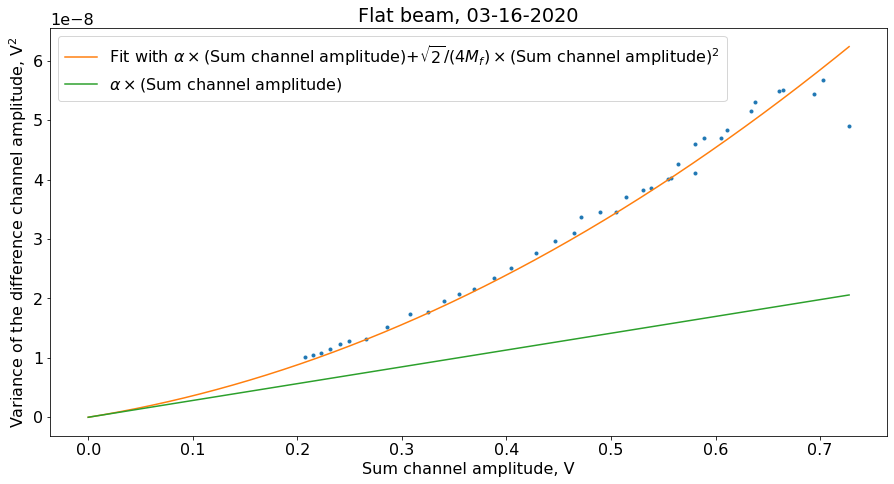

In [8]:
plt.plot(fluctuations_df["ch2_amplitude"],fluctuations_df["var_of_ch1_amplitude"] ,'.')
x_f = np.linspace(0,max(x1),1000)
plt.plot(x_f, alpha*x_f+a*x_f**2, label=r"Fit with $\alpha\times$(Sum channel amplitude)+$\sqrt{2}/(4M_f)\times$(Sum channel amplitude)$^2$")
plt.plot(x_f, alpha*x_f, label=r"$\alpha\times$(Sum channel amplitude)")
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title(r"Flat beam, 03-16-2020")
plt.legend()
plt.savefig(results_dir.fi("no_nd_filters_variable_beam_current.pdf"), bbox_inches='tight')
plt.show()

$\alpha=\frac{\sqrt{2}e}{4 C_f}$,
it is the predicted slope for the quantum Poisson contribution. - This estimation doesn't take into account attenuation and dispersion in the cable yet. When they are taken into account the agreement might get even better.
$M_f$ is the numer of coherent modes, according to the least squares fit.

$M_f = 4.1\times 10^6$

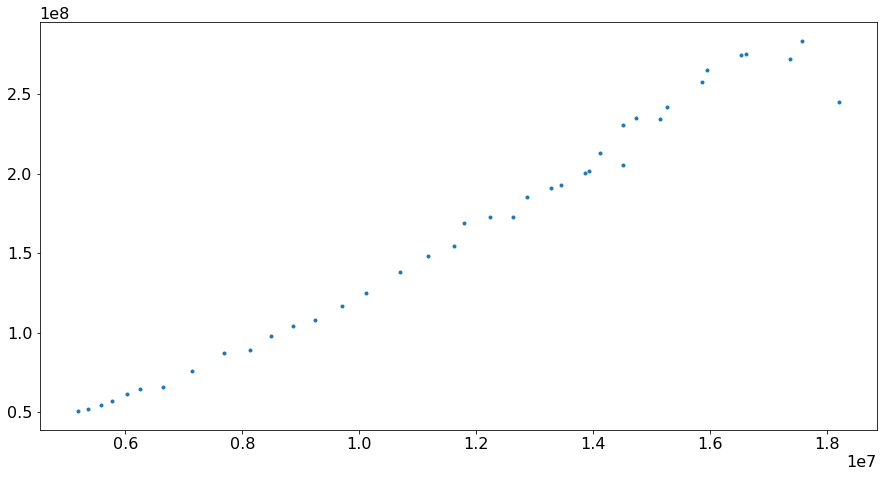

In [9]:
varN = 1/alpha**2*4*fluctuations_df["var_of_ch1_amplitude"].values
N = 1/alpha/np.sqrt(2)*fluctuations_df["ch2_amplitude"].values
plt.plot(N,varN,'.')
plt.show()